In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("bank.csv")

In [3]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [4]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

In [5]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [6]:
Y = all_df['deposit'].values.astype('int64')

In [7]:
X.shape

(11162, 7)

In [8]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [9]:
Y[:5]

array([1, 1, 1, 1, 1])

In [10]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [11]:
train_Features[355:359]

array([[ 3.400e+01,  0.000e+00,  1.000e+01,  9.700e+01,  1.000e+00,
         8.500e+01,  1.000e+00],
       [ 3.800e+01,  5.810e+02,  6.000e+00,  7.900e+01,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 3.000e+01,  1.336e+03,  1.800e+01,  1.300e+01,  3.000e+00,
         3.550e+02,  5.000e+00],
       [ 5.300e+01,  4.000e+00,  3.000e+01,  2.590e+02,  3.000e+00,
        -1.000e+00,  0.000e+00]])

In [12]:
train_Label[:4]

array([0, 1, 0, 1])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=21*2,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=21, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 42)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 22        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 8036 samples, validate on 893 samples
Epoch 1/30
8036/8036 [==============================] - 4s 530us/step - loss: 0.6053 - acc: 0.6831 - val_loss: 0.5232 - val_acc: 0.7648
Epoch 2/30
8036/8036 [==============================] - 3s 327us/step - loss: 0.5452 - acc: 0.7405 - val_loss: 0.5292 - val_acc: 0.7525
Epoch 3/30
8036/8036 [==============================] - 2s 302us/step - loss: 0.5229 - acc: 0.7512 - val_loss: 0.5257 - val_acc: 0.7671


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

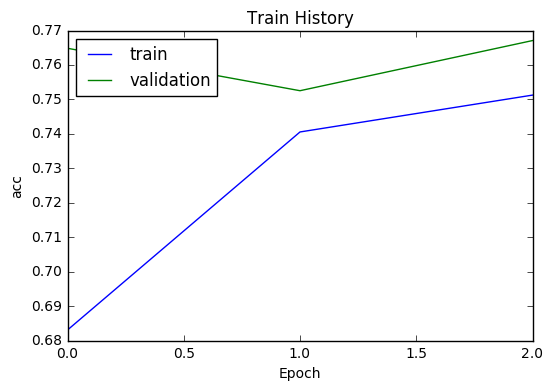

In [22]:
show_train_history(train_history,'acc','val_acc')

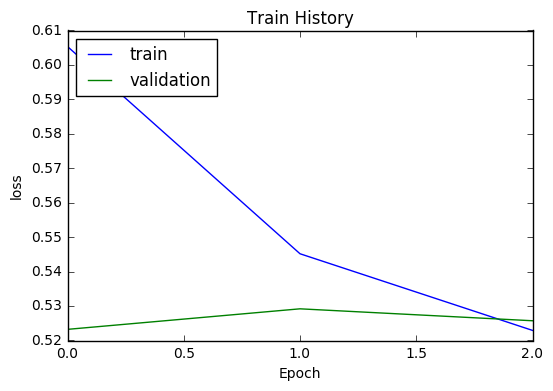

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 76us/step


In [25]:
scores[1]

0.7671294226221477